In [6]:
EIC_code = "10YES-REE------0" 
start_date = "2022-04-05T22:00Z"
end_date = "2022-05-05T22:00Z"

In [7]:
list_of_EIC_codes = ["10Y1001A1001A46L","10YDK-1--------W","10YES-REE------0","10YFR-RTE------C"]

In [ ]:
output_folder_path = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Engineering/Electricity Market/Output'

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
import gradio as gr

In [9]:
url = "https://electri.p.rapidapi.com/api/v1/day-ahead-prices"
querystring = {"to":end_date,"from":start_date,"eic":EIC_code}
headers = {
	"X-RapidAPI-Key": "7ad267cb53mshf4f5255c38f192ap19f964jsnc7abc0be43eb",
	"X-RapidAPI-Host": "electri.p.rapidapi.com"
}

In [10]:
data = requests.request("GET", url, headers=headers, params=querystring).json()
print(data)
df = pd.json_normalize(data['data']['series'])
df['time'] = pd.to_datetime(df['time'])
# 
df_metadata = pd.json_normalize(data)
currency = df_metadata['data.currency'].iloc[0]
power_unit = df_metadata['data.unit'].iloc[0]
eic = df_metadata['data.eic'].iloc[0]

{'message': "API doesn't exists"}


KeyError: 'data'

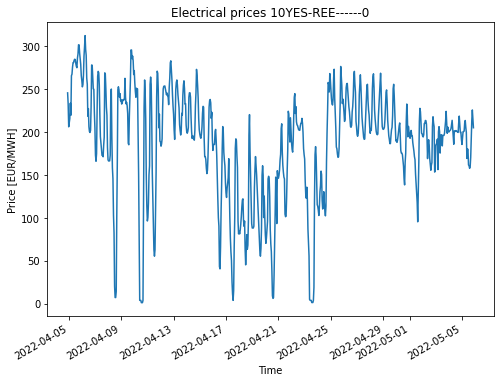

In [ ]:
format = '.pdf'
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df['time'], df['price']);
plt.title('Electrical prices '+ str(eic))
plt.xlabel('Time')
plt.ylabel('Price [' + str(currency) + '/' + str(power_unit) + ']')
fig.autofmt_xdate()
filename = output_folder_path + '/ePrices_'+ str(eic) + '_from_' + start_date + '_to_' + end_date + format
plt.savefig(filename, transparent=True)


/Users/danielfiuzadosil/opt/anaconda3/lib/python3.9/site-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Checkbox, please remove them: {'default': 'False'}
  warnings.warn(


Caching examples at: '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Engineering/Electricity Market/gradio_cached_examples/35/log.csv'
Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


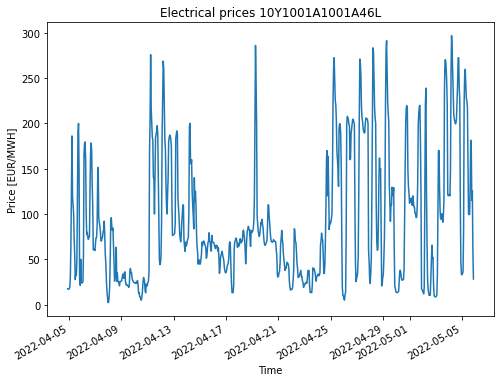

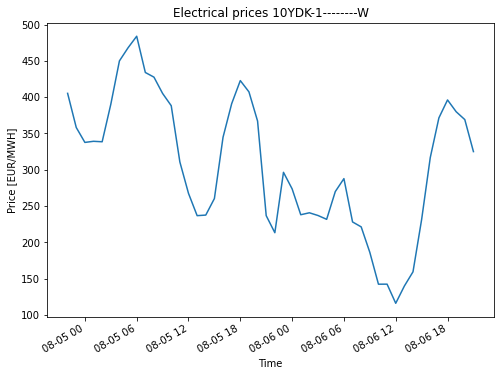

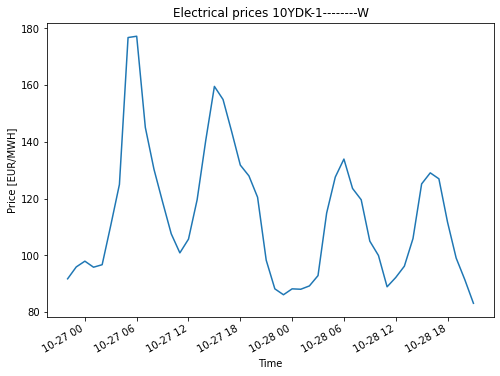

In [ ]:
def plot_e_pricing(EIC_code,start_date,end_date,tomorrow_rate):
    # 
    if tomorrow_rate == True:
        now = datetime.datetime.utcnow()
        tomorrow = now + datetime.timedelta(days=1)
        now = now.replace(microsecond=0).isoformat() + 'Z'
        tomorrow = tomorrow.replace(microsecond=0).isoformat() + 'Z'
        # 
        start_date = now
        end_date = tomorrow
    # 
    url = "https://electri.p.rapidapi.com/api/v1/day-ahead-prices"
    querystring = {"to":end_date,"from":start_date,"eic":EIC_code}
    headers = {
      "X-RapidAPI-Key": "7ad267cb53mshf4f5255c38f192ap19f964jsnc7abc0be43eb",
      "X-RapidAPI-Host": "electri.p.rapidapi.com"
    }
    data = requests.request("GET", url, headers=headers, params=querystring).json()
    df = pd.json_normalize(data['data']['series'])
    df['time'] = pd.to_datetime(df['time'])
    # 
    df_metadata = pd.json_normalize(data)
    currency = df_metadata['data.currency'].iloc[0]
    power_unit = df_metadata['data.unit'].iloc[0]
    eic = df_metadata['data.eic'].iloc[0]
    # 
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(df['time'], df['price']);
    plt.title('Electrical prices '+ str(eic))
    plt.xlabel('Time')
    plt.ylabel('Price [' + str(currency) + '/' + str(power_unit) + ']')
    fig.autofmt_xdate()
    # 
    # 
    return fig


inputs = [
    gr.Dropdown(list_of_EIC_codes, label="Electrical Provider EIC"),
    gr.Textbox(label="Start Date [YYYY-MM-DDTHH:MMZ]"),
    gr.Textbox(label="End Date [YYYY-MM-DDTHH:MMZ]"),
    gr.Checkbox(label="Tomorrow's rates?",default='False'),
]
outputs = gr.Plot()

demo = gr.Interface(
    fn=plot_e_pricing,
    inputs=inputs,
    outputs=outputs,
    examples=[
        ["10Y1001A1001A46L","2022-04-05T22:00Z","2022-05-05T22:00Z",False],
        ["10YDK-1--------W","2022-08-05T22:00Z","2022-08-06T22:00Z",False],
        ["10YDK-1--------W"," "," ",True],

    ],
    cache_examples=True,
)

if __name__ == "__main__":
    demo.launch()